In [70]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn import preprocessing
from scipy.special import expit
import matplotlib.pyplot as plt
import scikitplot as skplt
import pandas as pd
import numpy as np

In [115]:
# Loading in data
data = pd.read_csv("inputsong3.csv")

# Delete non-number columns
data = data.drop(['Artist'], axis=1)
data = data.drop(['Album'], axis=1)
data = data.drop(['Track ID'], axis=1)
data = data.drop(['Track'], axis=1)

In [116]:
# Mapping Keys to numbers
key_di = {0: "C",0: "B#", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 5: "E#", 6: "F#", 
          7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}

data.replace({"Key": key_di})
data = data.drop(['Key'], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,1997,76,0.255,0.430,9,-12.564,1,0.0322,0.546000,0.000019,0.188,0.546,164.267,4
1,1970,27,0.557,0.686,0,-11.742,1,0.0756,0.263000,0.033300,0.722,0.584,128.807,4
2,1989,37,0.650,0.755,2,-9.645,1,0.0281,0.000081,0.014500,0.326,0.782,124.844,4
3,1972,29,0.387,0.286,10,-16.637,1,0.0371,0.866000,0.001940,0.714,0.449,104.907,4
4,2012,0,0.530,0.802,0,-4.726,0,0.0308,0.009300,0.000070,0.120,0.175,138.039,4


In [126]:
data["Popularity"].astype(str).astype(int)
data['Popularity_bucket']=data.Popularity.map(lambda x: x/10).apply(np.floor).astype(int)
data.head(10)

,Release Date,Popularity,Danceability,Energy,Key Val,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Popularity_bucket
0,1997,76,0.255,0.430,9,-12.564,1,0.0322,0.546000,0.000019,0.188,0.546,164.267,4,7
1,1970,27,0.557,0.686,0,-11.742,1,0.0756,0.263000,0.033300,0.722,0.584,128.807,4,2
2,1989,37,0.650,0.755,2,-9.645,1,0.0281,0.000081,0.014500,0.326,0.782,124.844,4,3
3,1972,29,0.387,0.286,10,-16.637,1,0.0371,0.866000,0.001940,0.714,0.449,104.907,4,2
4,2012,0,0.530,0.802,0,-4.726,0,0.0308,0.009300,0.000070,0.120,0.175,138.039,4,0
5,1971,4,0.439,0.885,7,-8.191,1,0.0416,0.002820,0.969000,0.320,0.862,133.182,4,0
6,1968,3,0.426,0.473,0,-8.005,0,0.0316,0.799000,0.000000,0.125,0.417,107.876,4,0
7,2003,18,0.614,0.941,5,-2.811,1,0.0645,0.000877,0.666000,0.281,0.865,100.794,4,1
8,2004,29,0.383,0.697,0,-6.477,1,0.0292,0.049500,0.000270,0.276,0.540,180.238,3,2
9,1998,10,0.533,0.988,0,-3.898,0,0.1130,0.431000,0.000004,0.709,0.460,144.589,4,1


In [127]:
# Split training, testing, validation data by 80%, 10%, 10%
train_data, validate_data, test_data = np.split(data.sample(frac=1), [int(.8*len(data)), int(.9*len(data))])

In [128]:
# Split output and convert to array
train_output = train_data.Popularity_bucket
train_data = train_data.drop(['Popularity_bucket'], axis=1)
train_data = np.asarray(train_data,dtype=np.float64)
training_count = len(train_data[:,0])

validate_output = validate_data.Popularity_bucket
validate_data = validate_data.drop(['Popularity_bucket'], axis=1)
validate_data = np.asarray(validate_data,dtype=np.float64)
validate_count = len(validate_data[:,0])

test_output = test_data.Popularity_bucket
test_data = test_data.drop(['Popularity_bucket'], axis=1)
test_data = np.asarray(test_data,dtype=np.float64)
test_count = len(test_data[:,0])

In [129]:
#class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), 
# activation='relu', solver='adam', alpha=0.0001, batch_size='auto', 
# learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, 
# shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
# momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
# beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

mlp = MLPClassifier(hidden_layer_sizes=(14, 8,),solver='adam', activation='tanh',max_iter=1000)
mlp.fit(train_data,train_output)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(14, 8), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [131]:
test_pred = mlp.predict(test_data)
print("Testing set score: {}".format(mlp.score(test_data,test_output)))

Testing set score: 0.21162981162981162


In [132]:
print("accuracy score of training: {}".format(accuracy_score(train_output,mlp.predict(train_data))))
print("accuracy score of testing: {}".format(accuracy_score(test_output,mlp.predict(test_data))))
print("accuracy score of validating: {}".format(accuracy_score(validate_output,mlp.predict(validate_data))))

accuracy score of training: 0.20542643595781715
accuracy score of testing: 0.21162981162981162
accuracy score of validating: 0.209043250327654


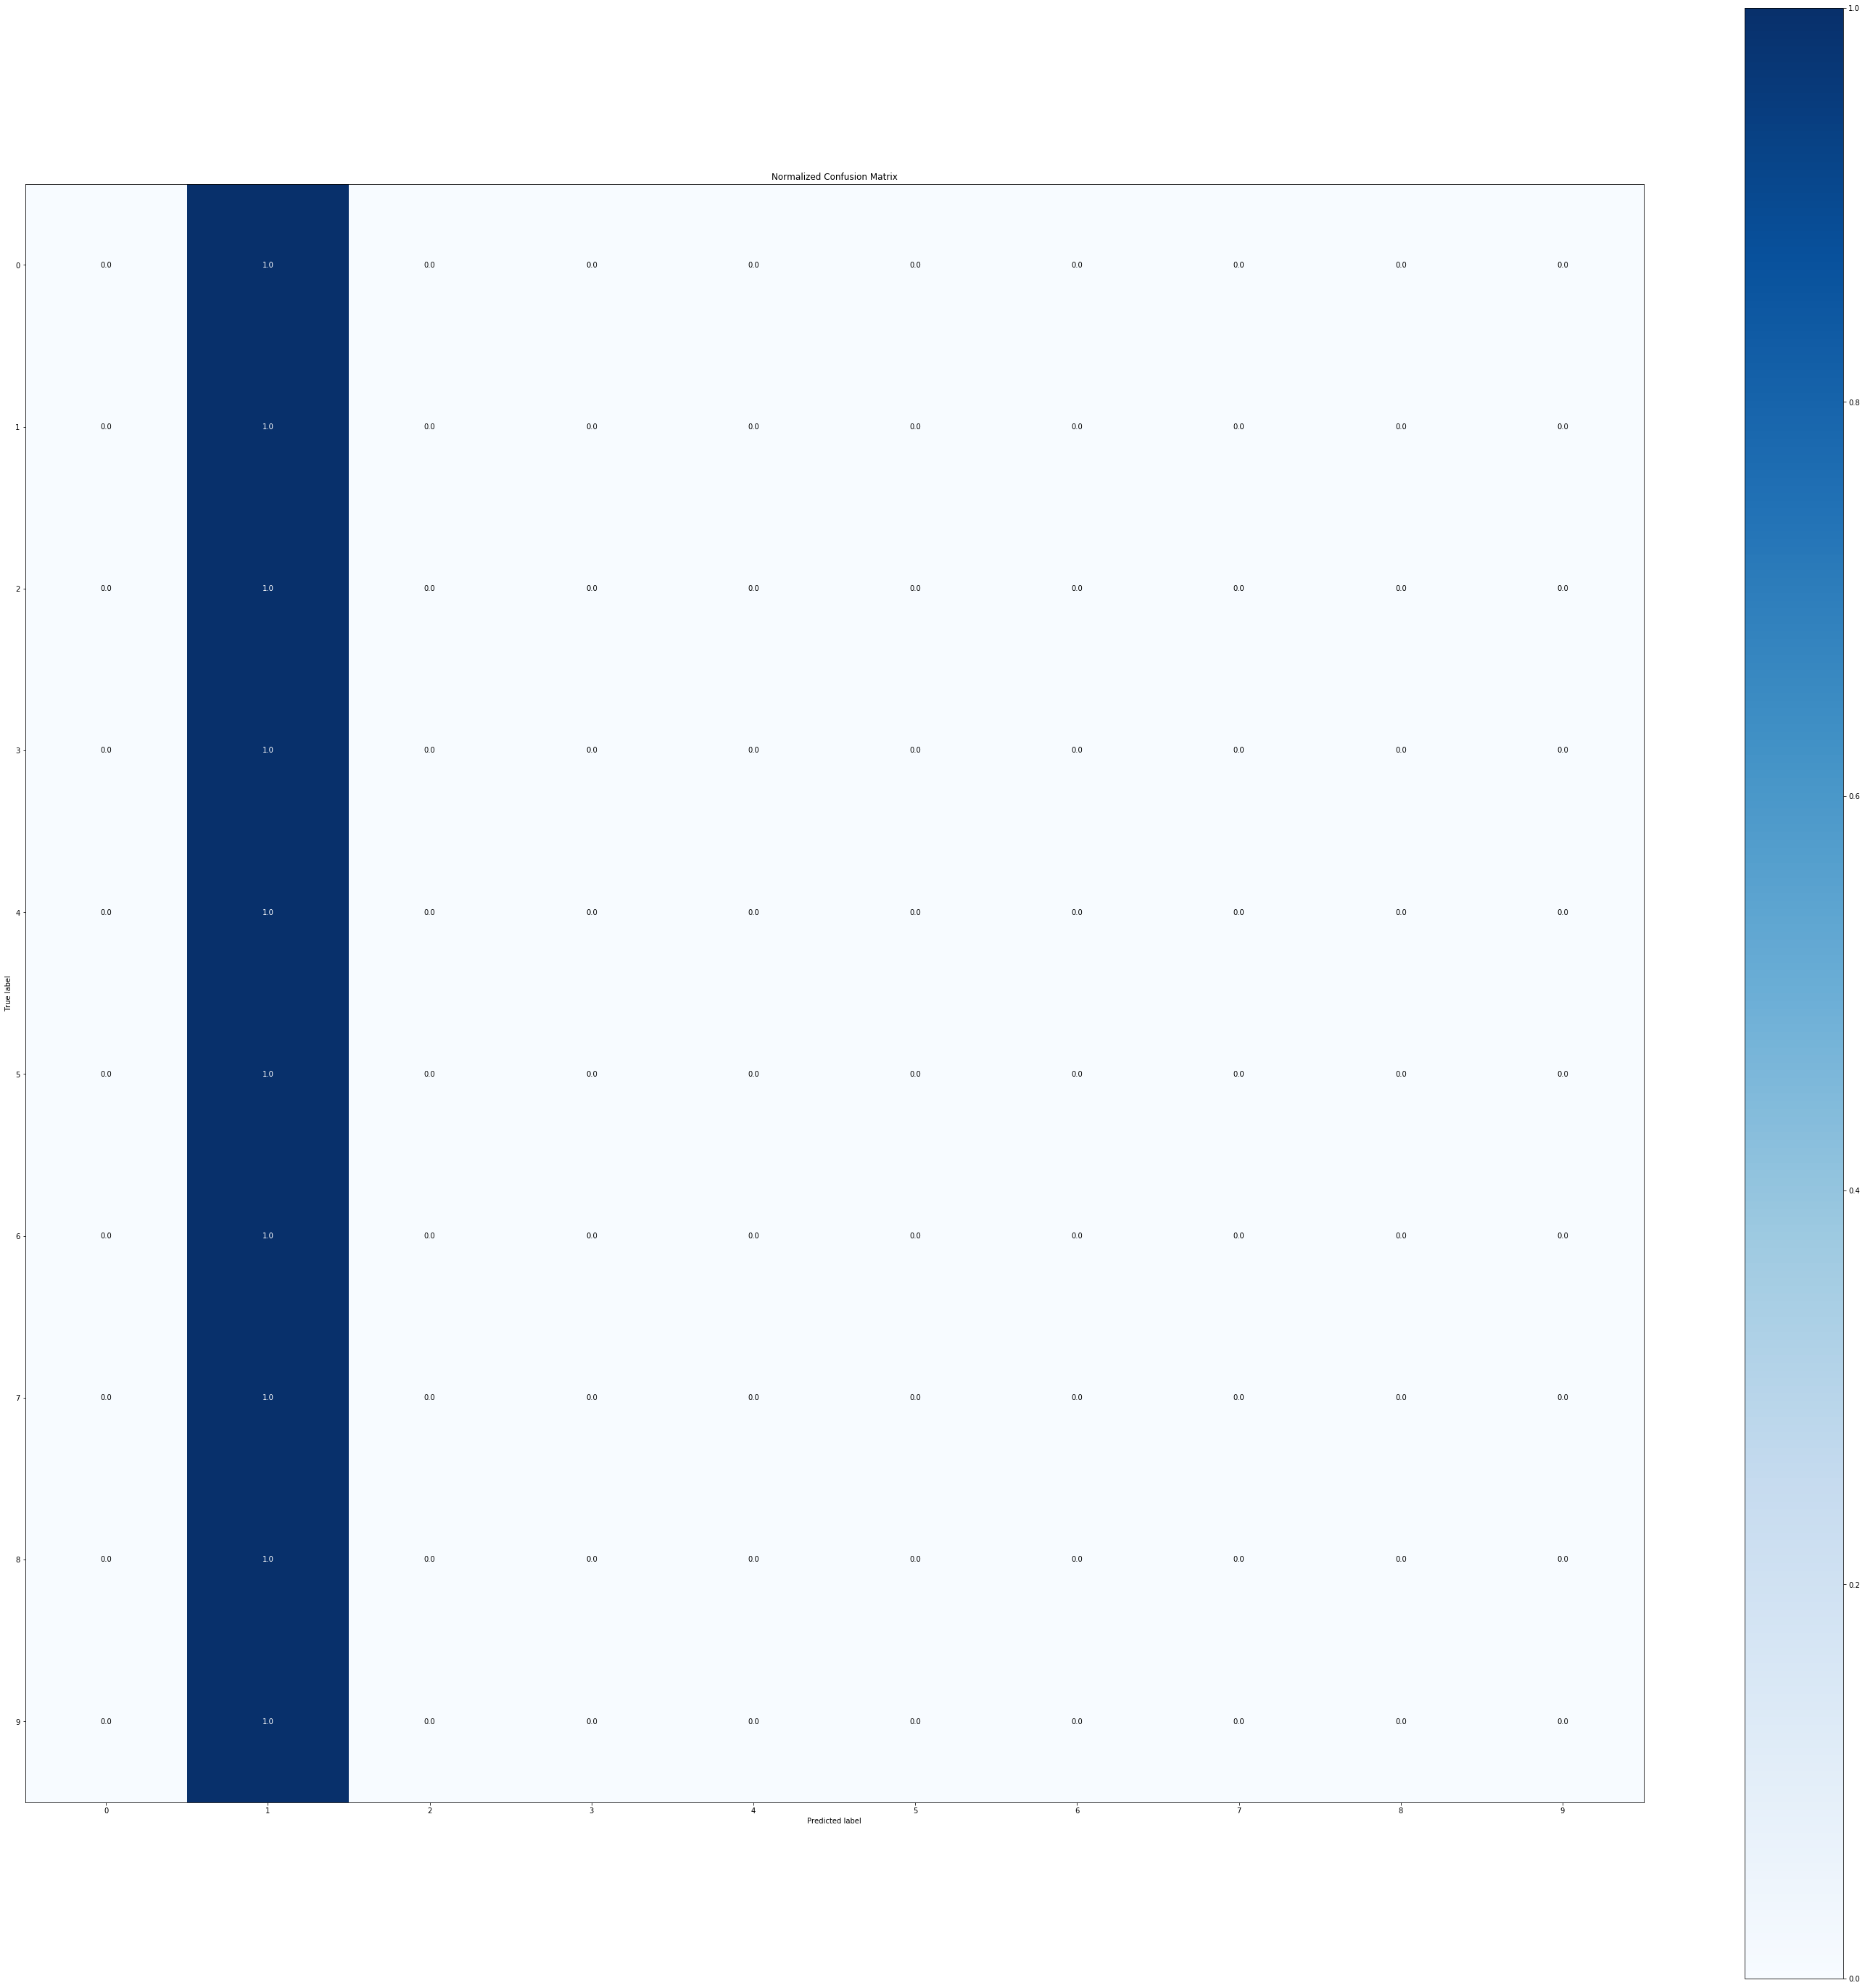

In [134]:
skplt.metrics.plot_confusion_matrix(test_output, test_pred, normalize=True, figsize=(50,50))